In [181]:
import pandas as pd
import numpy as np
import scipy.io as sc
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# load data
%ls ../../Datasets/Turbulence
df = pd.read_csv('../../Datasets/Turbulence/kepsilon.csv')
df.reset_index(names='Unnamed:0',inplace=True)
df.index.name = 't_step'
df.drop(columns=['Unnamed:0', 'Unnamed: 0'],inplace=True)
df.info()
df.head()

In [187]:
df.Case.unique()

array(['PHLL_case_0p5', 'PHLL_case_0p8', 'PHLL_case_1p0', 'PHLL_case_1p2',
       'PHLL_case_1p5', 'DUCT_1100', 'DUCT_1150', 'DUCT_1250',
       'DUCT_1300', 'DUCT_1350', 'DUCT_1400', 'DUCT_1500', 'DUCT_1600',
       'DUCT_1800', 'DUCT_2000', 'DUCT_2205', 'DUCT_2400', 'DUCT_2600',
       'DUCT_2900', 'DUCT_3200', 'DUCT_3500', 'BUMP_h20', 'BUMP_h26',
       'BUMP_h31', 'BUMP_h38', 'BUMP_h42', 'CBFS_13700', 'CNDV_12600',
       'CNDV_20580'], dtype=object)

In [ ]:
# wrangle data
df = df[df.Case.str.contains('DUCT')]
df['t'] = df.Case.str.extract('(\d+)', expand=False)
df.t = df.t.astype(int)
df.set_index('t',inplace=True)
dfsl = df.loc[:,'kepsilon_Cx':'kepsilon_Uz']
dfsl.columns = dfsl.columns.str.replace('kepsilon_','')
dfsl.drop(columns='Cx',inplace=True)
dfsl = dfsl[(dfsl.Cy >= -0.1) & (dfsl.Cy <= 0.1) & (dfsl.Cz >= -0.1) & (dfsl.Cz <= 0.1)]
dfsl.head()

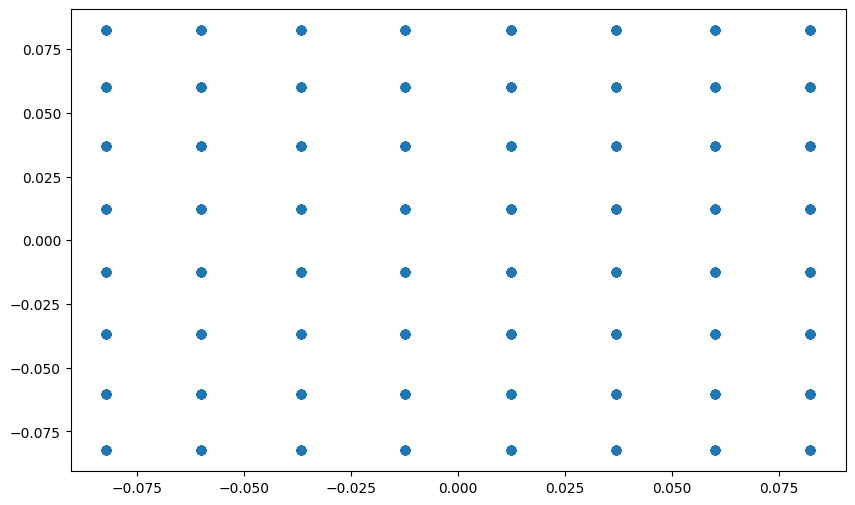

In [200]:
# visualise all the points
coord = dfsl[['Cy', 'Cz']]
# coord.duplicated().sum()
plt.figure(figsize=(10,6))
plt.scatter(dfsl.Cy, dfsl.Cz)
plt.show()

In [201]:
dfsl.head()

,Cy,Cz,Ux,Uy,Uz
t,,,,,
1100,0.012456,-0.082369,0.694952,1.133760e-11,-8.010710e-12
1100,0.012456,-0.060108,0.697996,1.016020e-11,-5.796210e-12
1100,0.012456,-0.036819,0.700154,8.975590e-12,-3.662180e-12
1100,0.012456,-0.012456,0.701304,7.981220e-12,-1.650950e-12
1100,0.036819,-0.082369,0.693761,8.985220e-12,-6.305060e-12
